In [ ]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Install openpyxl
!pip install openpyxl

# downloading file
!wget https://github.com/SayantaniDey2212/PowerBI_InPatientOutPatient_Dashboard/raw/main/Cleandata.xlsx

try:
    df = pd.read_excel("Cleandata.xlsx", engine="openpyxl")  # Specified the engine
    print(df.head(10))
except Exception as e:
    print(f"An error occurred: {e}")


--2025-02-20 06:15:13--  https://github.com/SayantaniDey2212/PowerBI_InPatientOutPatient_Dashboard/raw/main/Cleandata.xlsx
Resolving github.com (github.com)... 140.82.113.3
Connecting to github.com (github.com)|140.82.113.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/SayantaniDey2212/PowerBI_InPatientOutPatient_Dashboard/main/Cleandata.xlsx [following]
--2025-02-20 06:15:13--  https://raw.githubusercontent.com/SayantaniDey2212/PowerBI_InPatientOutPatient_Dashboard/main/Cleandata.xlsx
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.108.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 16424797 (16M) [application/octet-stream]
Saving to: ‘Cleandata.xlsx.1’

Cleandata.xlsx.1    100%[===================>]  15.66M  --.-KB/s    in 0.1s    

2025-02-

In [ ]:
# Display basic information
print("Dataset Overview:\n")
df.info()
print("\nSummary Statistics:\n", df.describe(include='all'))


Dataset Overview:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 453119 entries, 0 to 453118
Data columns (total 9 columns):
 #   Column           Non-Null Count   Dtype         
---  ------           --------------   -----         
 0   Source.Name      453119 non-null  object        
 1   Archive_Date     453119 non-null  datetime64[ns]
 2   Specialty_HIPE   452928 non-null  float64       
 3   Case_Type        453119 non-null  object        
 4   Adult_Child      452944 non-null  object        
 5   Age_Profile      453119 non-null  object        
 6   Time_Bands       453119 non-null  object        
 7   Total            453119 non-null  int64         
 8   Speciality_Name  453119 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(1), object(6)
memory usage: 31.1+ MB

Summary Statistics:
            Source.Name                   Archive_Date  Specialty_HIPE  \
count           453119                         453119   452928.000000   
unique               8     

In [ ]:
# Convert Archive_Date to datetime format
df["Archive_Date"] = pd.to_datetime(df["Archive_Date"], errors="coerce")


In [ ]:
# Check for missing values
print("\nMissing Values:\n", df.isnull().sum())



Missing Values:
 Source.Name          0
Archive_Date         0
Specialty_HIPE     191
Case_Type            0
Adult_Child        175
Age_Profile          0
Time_Bands           0
Total                0
Speciality_Name      0
dtype: int64


In [ ]:
# Handle missing values (optional - drop or fill)
df.fillna(method='ffill', inplace=True)


<ipython-input-6-f09fae148b0f>:2: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='ffill', inplace=True)


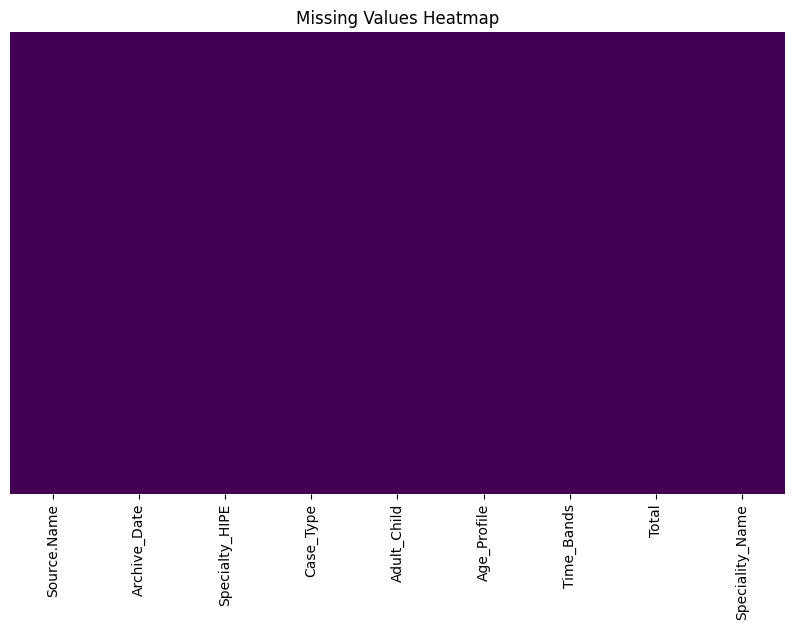

In [ ]:
# Visualize missing values
plt.figure(figsize=(10, 6))
sns.heatmap(df.isnull(), cmap='viridis', cbar=False, yticklabels=False)
plt.title("Missing Values Heatmap")
plt.show()

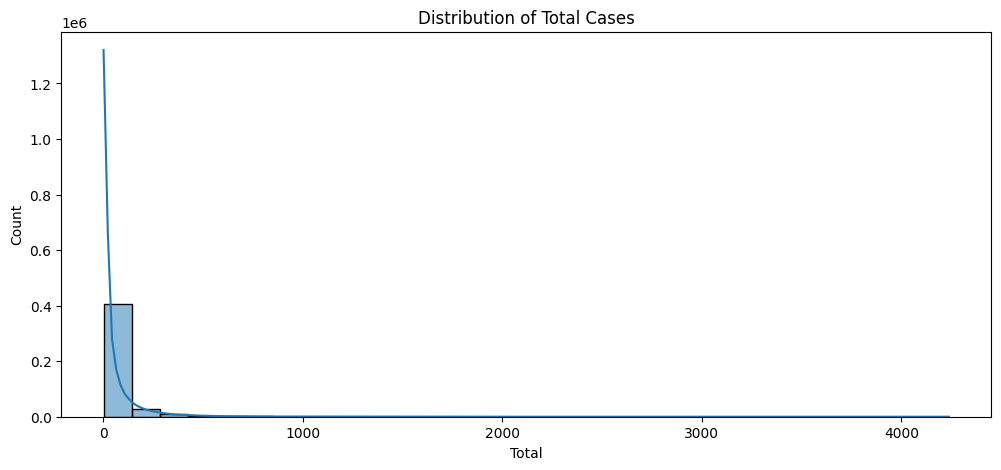

In [ ]:
# Distribution of numerical variables
plt.figure(figsize=(12, 5))
sns.histplot(df["Total"], bins=30, kde=True)
plt.title("Distribution of Total Cases")
plt.show()

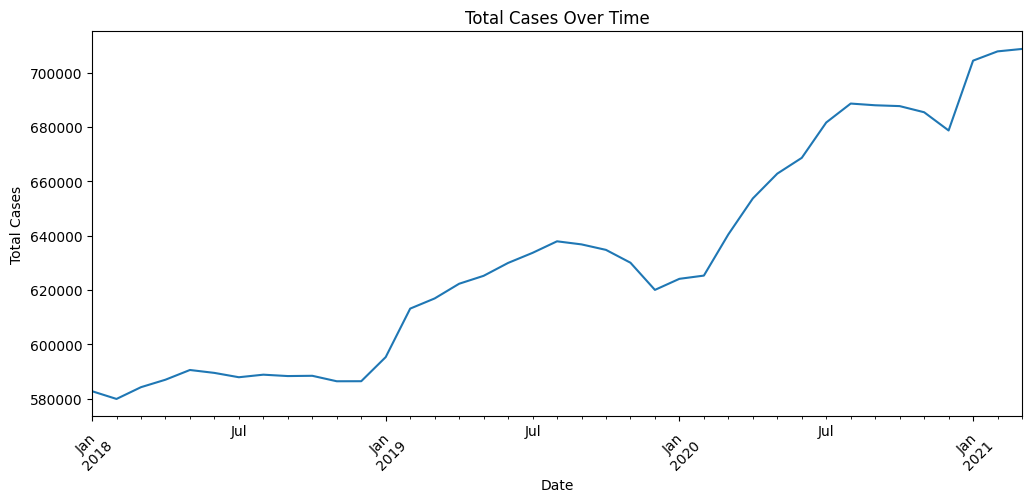

In [ ]:
# Trends over time
plt.figure(figsize=(12, 5))
df.groupby("Archive_Date")["Total"].sum().plot()
plt.title("Total Cases Over Time")
plt.xlabel("Date")
plt.ylabel("Total Cases")
plt.xticks(rotation=45)
plt.show()

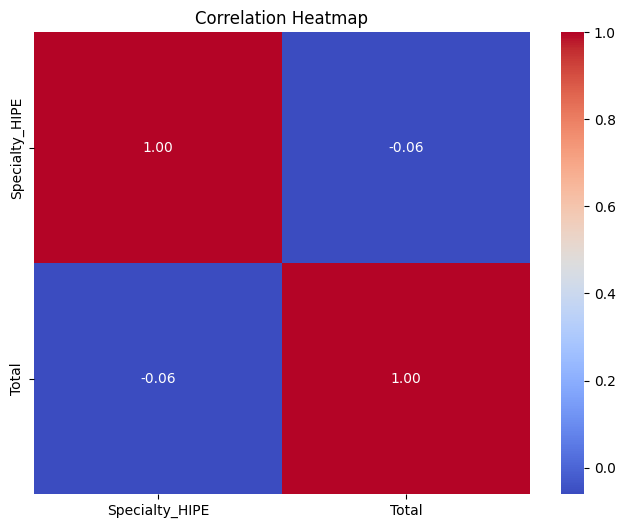

EDA completed!


In [ ]:
# Correlation heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

print("EDA completed!")